# Mini Project

### Eliot Harrell

Research Question: Which electric car companies are dominating the market?

Dataset Description: Data for all currently registered (as of September 2025) electric vehicles in Washington State. Chosen because Washington incentivizes electric vehicle use and is therefore a good microcosm for the competition between manufacturers.

[Dataset](https://catalog.data.gov/dataset/electric-vehicle-population-data)

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia-340-2025-fall-harrell-7337/Electric_Vehicle_Population_Data.csv') # load the data from s3
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,0.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
2,JM3KKBHA9R,Kitsap,Kingston,WA,98346.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,23.0,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303509e+10
3,7SAYGDEE8P,Thurston,Olympia,WA,98501.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,35.0,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EB5K,Thurston,Rainier,WA,98576.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,20.0,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


### Show descriptive statistics, information, and clean data

Displaying basic information:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261698 entries, 0 to 261697
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         261698 non-null  object 
 1   County                                             261688 non-null  object 
 2   City                                               261688 non-null  object 
 3   State                                              261698 non-null  object 
 4   Postal Code                                        261688 non-null  float64
 5   Model Year                                         261698 non-null  int64  
 6   Make                                               261698 non-null  object 
 7   Model                                              261698 non-null  object 
 8   Electric Vehicle Type                              261698 non-null  object

Displaying descriptive statistics:

In [3]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,261688.000000,261698.000000,261695.000000,261695.000000,261070.000000,2.616980e+05,2.616880e+05
mean,98176.150699,2021.772493,42.615071,695.503563,28.881955,2.412577e+08,5.297261e+10
std,2555.753410,3.034041,81.226054,6943.019653,14.889697,6.574252e+07,1.628791e+09
min,1469.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.150419e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.594588e+08,5.303303e+10
75%,98382.000000,2024.000000,35.000000,0.000000,42.000000,2.746481e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.791150e+08,6.601095e+10


Dropping duplicates and null values:

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261059 entries, 0 to 261697
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         261059 non-null  object 
 1   County                                             261059 non-null  object 
 2   City                                               261059 non-null  object 
 3   State                                              261059 non-null  object 
 4   Postal Code                                        261059 non-null  float64
 5   Model Year                                         261059 non-null  int64  
 6   Make                                               261059 non-null  object 
 7   Model                                              261059 non-null  object 
 8   Electric Vehicle Type                              261059 non-null  object 
 9 

The above operations removed a large number of duplicate values.

Importing AI tools:

In [6]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [7]:
pip install -U pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --only-binary=:all: "tiktoken>=0.7.0"

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install jupyter-ai-magics[all] -q

Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [11]:
%load_ext jupyter_ai_magics

Creating a new table:

In [12]:
%%ai gpt4 -f code
Using the dataframe established in {In[1]} and {Out[1]}, create a table that contains the most frequent Make value for each Model Year value.
For example, since Ford was the only company that is represented for 2000, FORD would be the most frequent for that year.
Assign this table to a new dataframe, make_year.

In [13]:
make_year = df.groupby('Model Year')['Make'].agg(lambda x:x.value_counts().index[0]).reset_index()

In [14]:
make_year

,Model Year,Make
0,2000,FORD
1,2002,TOYOTA
2,2003,TOYOTA
3,2008,TESLA
4,2010,TESLA
5,2011,NISSAN
6,2012,NISSAN
7,2013,NISSAN
8,2014,CHEVROLET
9,2015,NISSAN


This new table implies that Tesla has been increasingly popular over the years.

In [15]:
%%ai gpt4 -f code
Using the dataframe established in {In[1]} and {Out[1]}, show the make, model, and electrice range ONLY for the model year 2018.
This should be contained in a dataframe called stats_2018.

In [16]:
# Filter the data for the model year 2018 and select the required columns
stats_2018 = df[df['Model Year'] == 2018][['Make', 'Model', 'Electric Range']]

In [17]:
stats_2018

,Make,Model,Electric Range
15,TESLA,MODEL S,249.0
18,CHEVROLET,BOLT EV,238.0
21,PORSCHE,PANAMERA,16.0
32,TESLA,MODEL S,249.0
40,TESLA,MODEL 3,215.0
...,...,...,...
261642,FORD,FUSION,21.0
261663,HONDA,CLARITY,47.0
261668,TESLA,MODEL X,238.0
261677,TESLA,MODEL 3,215.0


## Create visualizations

In [18]:
%%ai gpt4 -f code
Using the dataframe established in {In[1]} and {Out[1]}, create a scatterplot of the electric range values (y axis) by model year (x axis).
Name the chart as well as the axes. Use units in the axis names.

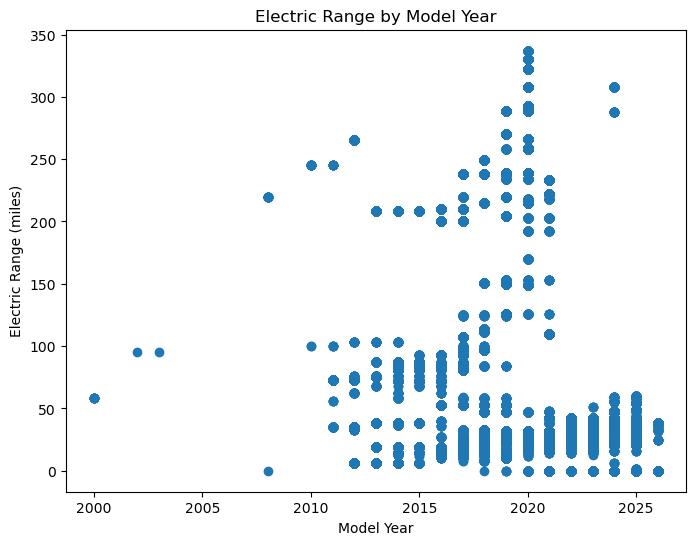

In [19]:
import matplotlib.pyplot as plt

# Scatter plot of Electric Range by Model Year
plt.figure(figsize=(8,6))
plt.scatter(df['Model Year'], df['Electric Range'])
plt.title('Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.show()

This scatterplot displays that while the number of vehicles with low range increased over time (likely due to the increase in electric vehicle popularity), the overall maximum range of the vehicles increased between 2000 and 2026 variants.

In [20]:
%%ai gpt4 -f code
Using the dataframe established in {In[1]} and {Out[1]}, create a multi-line chart that shows the frequency (y axis) of the top 10 makes by model year (x axis).
Color-code the line of each make, and include a legend that shows which color corresponds to which make.
The chart and axes should have titles and units if necessary. Do not re-import matplotlib. 

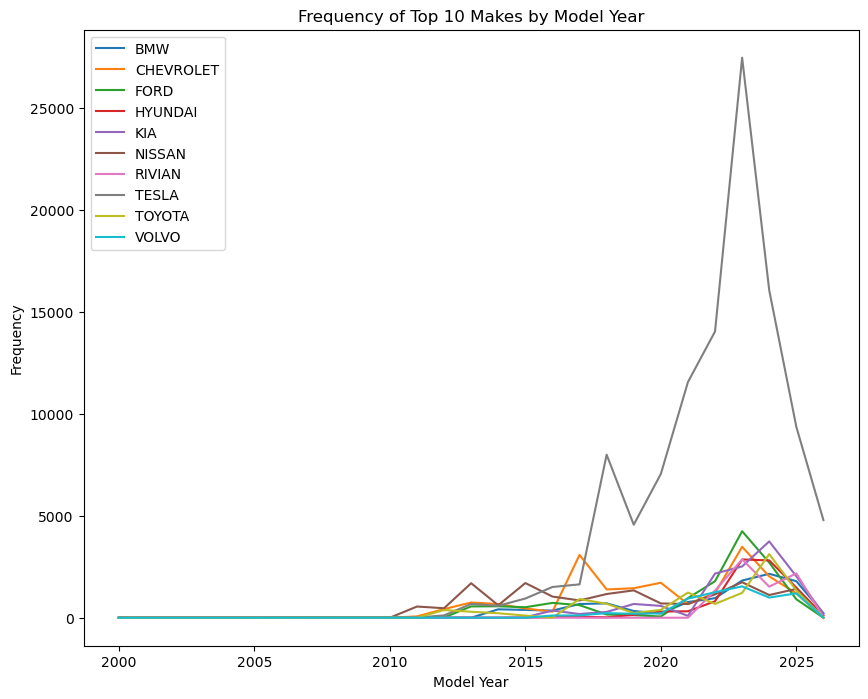

In [21]:
# Find the top 10 makes by frequency
top_10_makes = df['Make'].value_counts().head(10).index

# Filter the data to only include rows where the make is one of the top 10
filtered_df = df[df['Make'].isin(top_10_makes)]

# Create a pivot table for the frequencies of each make by model year
pivot_df = filtered_df.pivot_table(index='Model Year', columns='Make', aggfunc='size', fill_value=0)

# Multi-line chart
plt.figure(figsize=(10,8))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.title('Frequency of Top 10 Makes by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

This chart shows the meteoric rise of Tesla as an electric vehicle manufacturer between the late-2010s and the mid-2020s. We can see an attempt by Chevrolet, immediately prior to Tesla's skyrocket, to make moves around 2016, but Tesla quickly overtakes them. There is a sharp decline in model-years from about 2023 onward, which could be due to a number of factors, including the steep price of new EVs as well as the election of Donald Trump, who promised to eliminate the EV tax incentives on a federal level.

## Conclusion:

### As I expected, Tesla has complete EV market domination in the state of Washington. This was unsurprising due to the company's cultural popularity and historical domination in the 2010s. This trend is clearly still ongoing, although it is possible (not proven) that sales are declining in recent years, though this may be simply due to the price of new cars overall.